# **UTS Pengelolahan Citra**
---
### Nama : Ardiansyah Al Cahya Maulana
### Kelas : Ilmu Komputer 4B
### Nim : 2255201056









In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

#### TEST OPEN GAMBAR

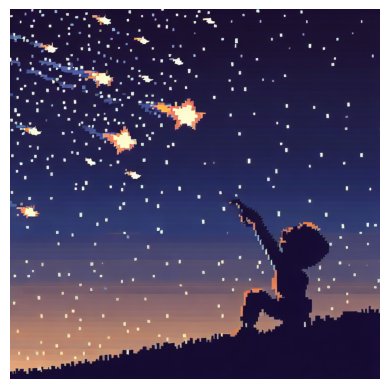

In [3]:
imgnya: np.array = cv2.imread('/content/drive/MyDrive/Colab Notebooks/ai1.png', cv2.IMREAD_COLOR)
img_rgb: np.array = cv2.cvtColor(imgnya, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(img_rgb)
plt.show()

### Tugas Pencapaian 8 Jenis
*   Grayscale
*   Blur
*   Zoom
*   sepia
*   saturated
*   invert
*   opacity
*   brightness
*   contrast
*   drop-shadow









In [4]:
# Import Dependency
!pip install kornia;

import torch
import kornia
import torchvision
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image, ImageFilter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

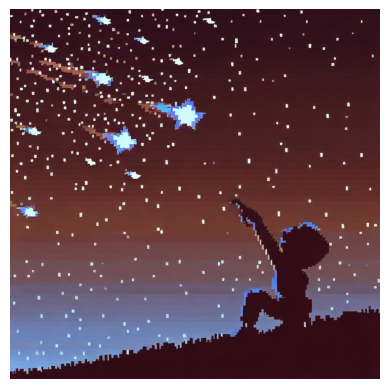

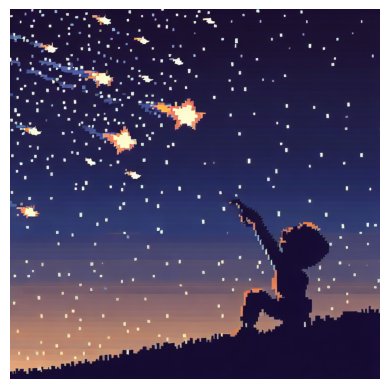

In [5]:
# Load Image To Kornia Tensor
img_tensor: torch.Tensor = kornia.io.load_image('/content/drive/MyDrive/Colab Notebooks/ai1.png', kornia.io.ImageLoadType.RGB32)  # CxHxW
img_array = kornia.tensor_to_image(img_tensor)

# Convert Tensor To BGR
x_rgb: torch.Tensor = img_tensor
x_bgr: torch.Tensor = kornia.color.rgb_to_bgr(x_rgb)

# Convert RGB
imgRGB = kornia.color.bgr_to_rgb(x_bgr)

#function show images
def sw_img(img_tensor, cmapnya):
  # Convert Tensor to image
  imgNya: np.array = kornia.tensor_to_image(img_tensor)
  plt.axis("off")
  plt.imshow(imgNya, cmap=cmapnya)
  plt.show()

# Test Load Imagenya
sw_img(x_bgr, None) # BHR IMAGES
sw_img(imgRGB, None) # RGB IMAGES

### **1. Grayscale**

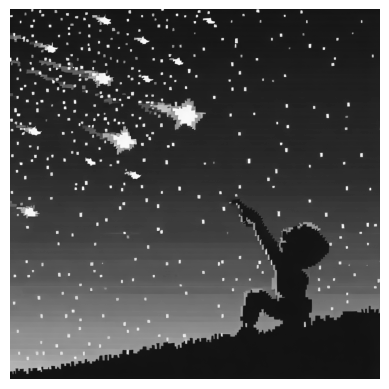

In [ ]:
grayscale = kornia.color.rgb_to_grayscale(imgRGB, rgb_weights=None)
sw_img(grayscale, 'gray')

### **2. Blur**

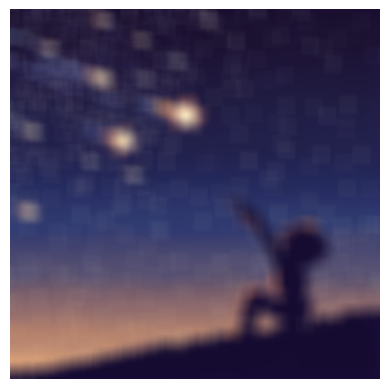

In [ ]:
blur: torch.Tensor = kornia.filters.box_blur(imgRGB.unsqueeze(0), (50, 50))
sw_img(blur, None)

### **3. Zoom**

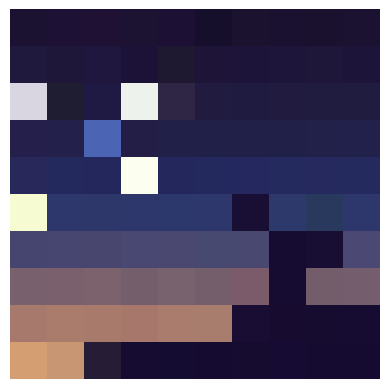

In [ ]:
zoomed_img = kornia.geometry.transform.resize(imgRGB.unsqueeze(0), (10))
sw_img(zoomed_img, None)

### **4. Sepia**

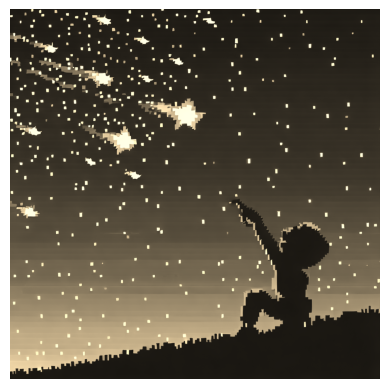

In [ ]:
sepia = kornia.color.sepia(imgRGB.unsqueeze(0), rescale=False, eps=1)
sw_img(sepia, None)

### **5. Saturated**

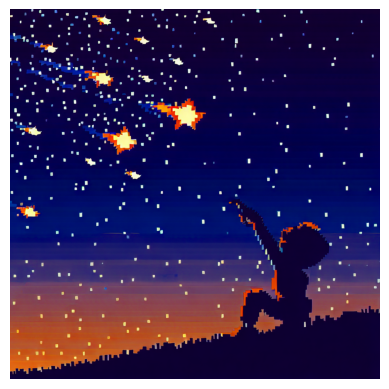

In [ ]:
saturated = kornia.enhance.adjust_saturation(imgRGB.unsqueeze(0), 2.0)
sw_img(saturated, None)

### **6. Invert**

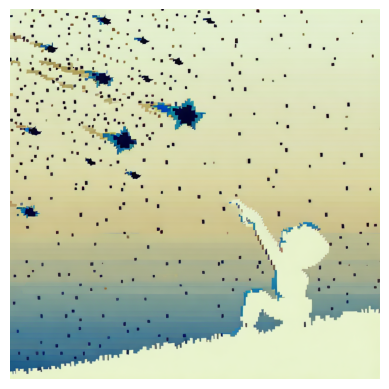

In [ ]:
invert = kornia.enhance.invert(imgRGB.unsqueeze(0), max_val=torch.tensor(1.0))
sw_img(invert, None)

### **7. Opacity**

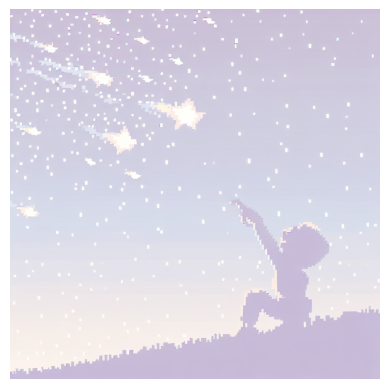

In [ ]:
opacity = kornia.enhance.adjust_gamma(imgRGB, 0.06, gain=1.0)
sw_img(opacity, None)

### **8. Brightness**

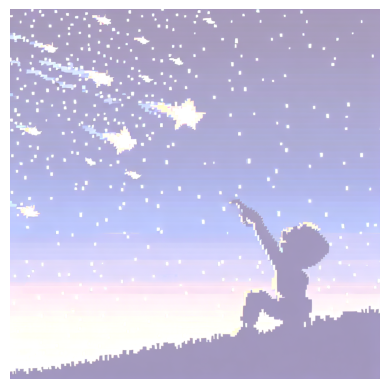

In [ ]:
brightness = kornia.enhance.adjust_brightness(imgRGB, 0.55, clip_output=True)
sw_img(brightness, None)

### **9. Contrast**

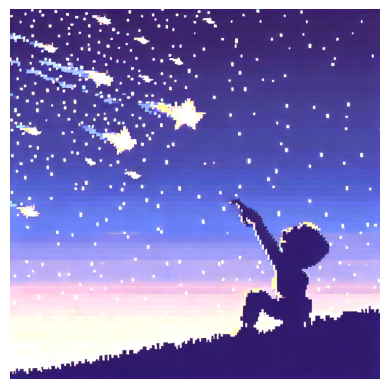

In [ ]:
contrast = kornia.enhance.adjust_contrast(imgRGB, 2.2, clip_output=True)
sw_img(contrast, None)

### **10. Drop Shadow**

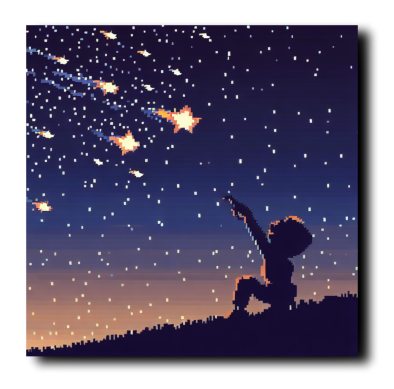

In [44]:
def makeShadow(image, blur, border, offset, backgroundColour, shadowColour):

    fullWidth  = image.size[0] + abs(offset[0]) + 2*border
    fullHeight = image.size[1] + abs(offset[1]) + 2*border

    shadow = Image.new(image.mode, (fullWidth, fullHeight), backgroundColour)

    shadowLeft = border + max(offset[0], 0)
    shadowTop  = border + max(offset[1], 0)

    shadow.paste(shadowColour,
                [shadowLeft, shadowTop,
                 shadowLeft + image.size[0],
                 shadowTop  + image.size[1] ])

    for i in range(blur):
        shadow = shadow.filter(ImageFilter.BLUR)


    imgLeft = border - min(offset[0], 0)
    imgTop  = border - min(offset[1], 0)
    shadow.paste(image, (imgLeft, imgTop))

    return shadow

image = Image.open('/content/drive/MyDrive/Colab Notebooks/ai1.png')
blur = 100
border = 50
offset = [34, 20]
backgroundColour = (255, 255, 255)
shadowColour = (0, 0, 0, 128)

shadow_image = makeShadow(image, blur, border, offset, backgroundColour, shadowColour)
plt.axis("off")
plt.imshow(shadow_image)
plt.show()